In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json
from census import Census
from uszipcode import SearchEngine

# API Keys
from api_keys import gkey
from api_keys import census_key

## Using Census API to get data for different US zip codes 

In [ ]:
#Recording different year census data
all_census=[]
for i in [2012,2014,2015,2017,2019]:
    c = Census(census_key, year=i)
    census_data = c.acs5.get(("NAME", "B19013_001E", "B02001_002E","B02001_003E",
                           "B03001_003E","B02001_005E","B01003_001E", "B01002_001E",
                          "B19301_001E","B17001_002E","B23025_005E","B25077_001E","B08136_003E",
                          "B25035_001E","B25088_002E","B25064_001E","B08301_001E",
                          "B08301_010E","B08301_003E","B08136_007E","B15003_017E",
                          "B15003_022E","B15003_002E","B16001_002E","B16001_003E"),
                          {'for': 'zip code tabulation area:*'})

    # Convert to DataFrame
    census_df = pd.DataFrame(census_data)

    # Column Reordering
    census_df = census_df.rename(columns={"B01003_001E": "Population",
                                      "B02001_002E":"Population White",
                                      "B02001_003E": "Population Black",
                                      "B03001_003E": "Population Hispanic",
                                      "B02001_005E": "Population Asian",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "B25077_001E":"House Value",
                                      "B25035_001E": "House Construction Year",
                                      "B25088_002E":"Monthly Owner Cost",
                                      "B25064_001E":"Monthly Rent",
                                      "B08301_001E":"Total Transport",
                                      "B08301_010E":"Public Transport",
                                      "B08301_003E":"Personal Transport",
                                      "B08136_007E":"Commute Time Public",
                                      "B08136_003E":"Commute Time Car",
                                      "B15003_017E":"High School Count",
                                      "B15003_022E":"College Count",
                                      "B15003_002E":"Uneducated Count",
                                      "B16001_002E":"English Language",
                                      "B16001_003E":"Spanish Language",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

    # Add in Poverty Rate (Poverty Count / Population)
    census_df["Poverty Rate"] = (100 * 
                census_df["Poverty Count"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in Employment Rate (Employment Count / Population)
    census_df["Unemployment Rate"] = (100 * 
                census_df["Unemployment Count"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in High school education Rate (High School Count / Population)
    census_df["High School Rate"] = (100 * 
                census_df["High School Count"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in College Education Rate (College Count / Population)
    census_df["College Rate"] = (100 * 
                census_df["College Count"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in Uneducated Rate (uneducated Count / Population)
    census_df["Uneducated Rate"] = (100 * 
                census_df["Uneducated Count"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in Public Transport Rate (Public Transport / Total Transportation)
    census_df["Public Transport Rate"] = (100 * 
                census_df["Public Transport"].astype(
                    int) / census_df["Total Transport"].astype(int))

    # Add in Personal Transport Rate (Personal Transport  / Total transportation)
    census_df["Personal Transport Rate"] = (100 * 
                census_df["Personal Transport"].astype(
                    int) / census_df["Total Transport"].astype(int))
    
    # Add in English Language Rate
    #census_df["English Language Rate"] = (100 * 
                #census_df["English Language"].astype(
                    #int) / census_df["Population"].astype(int))
    # Add in Spanish Language Rate
    #census_df["Spanish Language Rate"] = (100 * 
                #census_df["Spanish Language"].astype(
                    #int) / census_df["Population"].astype(int))

    # Add in White Population Rate
    census_df["White Population Rate"] = (100 * 
                census_df["Population White"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in Black Population Rate
    census_df["Black Population Rate"] = (100 * 
                census_df["Population Black"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in Hispanic Population Rate (Population Hispanic / Total Population)
    census_df["Hispanic Population Rate"] = (100 * 
                census_df["Population Hispanic"].astype(
                    int) / census_df["Population"].astype(int))

    # Add in Asian Population Rate (Population Asian  / Total population)
    census_df["Asian Population Rate"] = (100 * 
                census_df["Population Asian"].astype(
                    int) / census_df["Population"].astype(int))

    # Final DataFrame
    census_df = census_df[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Rate", 
                       "Unemployment Rate", "House Value","House Construction Year",
                      "Monthly Owner Cost", "Monthly Rent","Public Transport Rate",
                      "Personal Transport Rate","Commute Time Public","Commute Time Car",
                    "High School Rate","College Rate","Uneducated Rate", 'English Language',#"English Language Rate",
                      "Spanish Language","White Population Rate","Black Population Rate",
                      "Hispanic Population Rate","Asian Population Rate"]]
    #appending dataframe to all census list
    all_census.append(census_df)

In [ ]:
# Save different years data as a csv 
for i,census in zip([2012,2014,2015,2017,2019],all_census):
    census.to_csv(f"output_census/census_data_{i}.csv", encoding="utf-8", index=False)

### Reading US census csv for different years 

In [2]:
#reading 2012 census data
path_2012=os.path.join('output_census', 'census_data_2012.csv')
census_2012=pd.read_csv(path_2012)

In [ ]:
#reading 2014 census data
path_2014=os.path.join('output_census', 'census_data_2014.csv')
census_2014=pd.read_csv(path_2012)

In [ ]:
#reading 2015 census data
path_2015=os.path.join('output_census', 'census_data_2015.csv')
census_2015=pd.read_csv(path_2012)

In [ ]:
#reading 2017 census data
path_2017=os.path.join('output_census', 'census_data_2017.csv')
census_2017=pd.read_csv(path_2012)

In [ ]:
#reading 2019 census data
path_2019=os.path.join('output_census', 'census_data_2019.csv')
census_2019=pd.read_csv(path_2012)

In [ ]:
census_2012

In [ ]:
combined_census= census_2012.merge(census_2014,
                        how='outer', on='Zipcode', 
                        suffixes=['(2012)', '(2014)']).merge(census_2015,
                        how='outer', on='Zipcode').merge(census_2017,
                        how='outer', on='Zipcode', suffixes=['(2015)', '(2017)']).merge(
                        census_2019,how='outer', on='Zipcode')

In [3]:
#Using search engine to from zipcode to look different values
search = SearchEngine()
zipcode = search.by_zipcode("92122")
zipcode.state

'CA'

In [4]:
#Adding new city, county, lat, lng, housing units columns  to census 2012
census_2012["City"]=''
census_2012["County"]=''
census_2012['Lat']=''
census_2012['Lng']=''
census_2012['Housing_units']=''
census_2012['State']=''
for index, row in census_2012.iterrows():

    # get zipcode type from df
    zipcode = int(row['Zipcode'])
    #Searching by zipcode
    search = SearchEngine()
    results = search.by_zipcode(str(zipcode))
    #adding to City columns
    try:
        census_2012.loc[index, 'City'] = results.city
        census_2012.loc[index, 'County'] = results.county
        census_2012.loc[index, 'Lat'] = results.lat
        census_2012.loc[index, 'Lng'] = results.lng
        census_2012.loc[index, 'Housing_units'] = results.housing_units
        census_2012.loc[index, 'State'] = results.state
    except (KeyError, IndexError):
        print("Missing field/result for... skipping.")

In [19]:
#making a csv file for the added columns
census_2012.to_csv("output_census/census_comb_2012.csv", encoding="utf-8", index=False)

In [5]:
census_2012.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [20]:
#creating census data for california only
census_ca=census_2012[census_2012['State']=='CA']
#making a csv file for the CA census only
census_ca.to_csv("output_census/census_ca_2012.csv", encoding="utf-8", index=False)

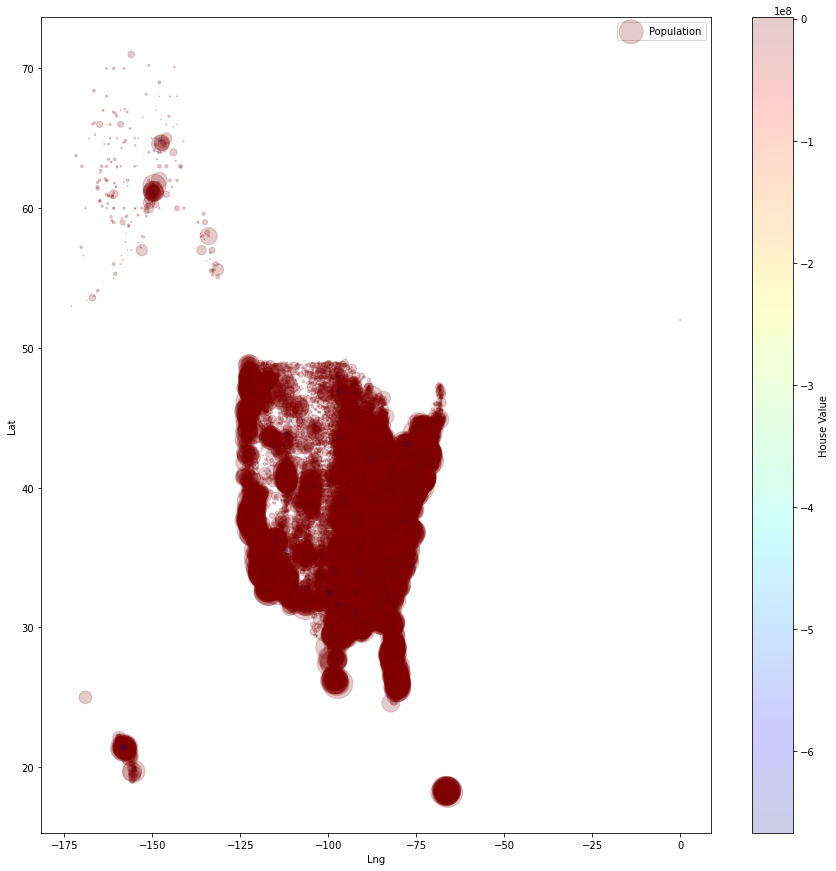

In [18]:
#plotting
fig, ax=plt.subplots(figsize=(15,15))
census_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.2, 
                s=census_2012['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('jet'),
                colorbar=True, ax=ax)
#ax.set_xlimit([-175,-125])
plt.show()

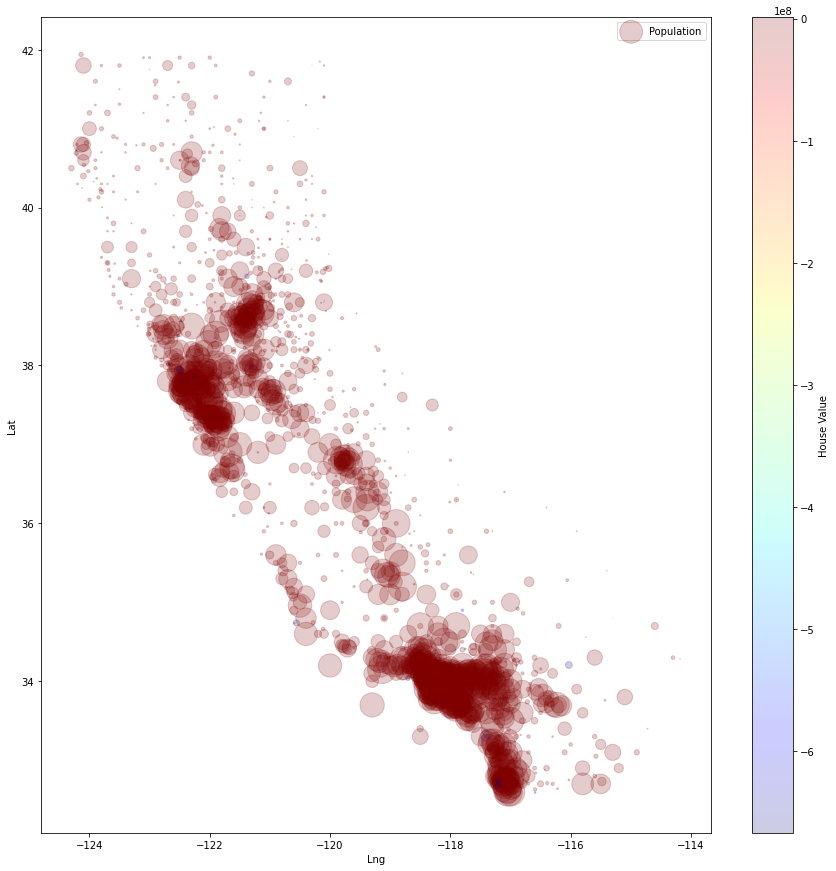

In [15]:
#plotting
fig, ax=plt.subplots(figsize=(15,15))
census_ca.plot(kind='scatter', x='Lng', y='Lat', alpha=0.2, 
                s=census_ca['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('jet'),
                colorbar=True, ax=ax)
#ax.set_ylimit([-125,-175])
plt.show()